In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc

# Import data

In [3]:
data = pd.read_csv('D:/wildfires/fires_merged_weather.csv', index_col=0,
                  #dtype for smaller representation
                  dtype={'STAT_CAUSE_DESCR': 'category', 'STATE': 'category', 'DISCOVERY_MONTH': 'category',
                        'Fog': 'bool', 'FunnelCloud': 'bool', 'Hail': 'bool', 'Rain': 'bool',
                        'Snow': 'bool', 'Thunder': 'bool'}
                  )

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
data.drop(['Unnamed: 0.1', 'index_x', 'FOD_ID', 'FIRE_NAME', 'DISCOVERY_DOY_SCALED',
           'x_fire', 'y_fire', 'z_fire',
           'index_y', 'Begin', 'End', 'Country', 'Day', 'ICAO', 'Latitude', 'Longitude', 'Month', 'STATION NAME',
           'State', 'Station', 'USAF', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 
           'WBAN', 'Year', 'doy', 'x', 'y', 'z',
          ],
         axis='columns', inplace=True)

In [5]:
gc.collect()

2553

In [6]:
data.columns

Index(['STAT_CAUSE_DESCR', 'FIRE_YEAR', 'DISCOVERY_DOY', 'FIRE_SIZE',
       'LATITUDE', 'LONGITUDE', 'STATE', 'CONTAINED', 'DISCOVERY_MONTH',
       'DISTANCE_CITY_1000000', 'DISTANCE_CITY_100000', 'DISTANCE_CITY_10000',
       'DISTANCE_CITY_1000', 'APPROX_ELEVATION', 'DewPoint', 'Elevation',
       'Fog', 'FunnelCloud', 'Gust', 'Hail', 'MaxTemp', 'MaxWindspeed',
       'MinTemp', 'Precip', 'Rain', 'SeaLevelPressure', 'Snow', 'SnowDepth',
       'StationPressure', 'Temp', 'Thunder', 'Visibility', 'Windspeed'],
      dtype='object')

# Percent missing values - augmented features

In [7]:
# Subsitute sentinels for missing data, with np.nan

augmented_features = data.drop('STAT_CAUSE_DESCR', axis='columns').iloc[:,8:]

for na in [9999.9, 999.9, 99.99]:
    augmented_features[augmented_features == na] = np.nan

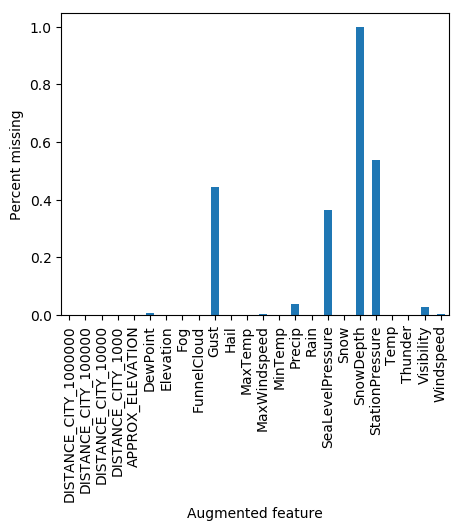

In [25]:
countna = augmented_features.isna().sum()

fig, ax = plt.subplots(figsize=(5,4), dpi=100)
ax.grid()
ax.set_ylabel("Percent missing")
ax.set_xlabel("Augmented feature")
(countna / augmented_features.shape[0]).plot(kind = 'bar', ax=ax)

### We need to handle these missing values differently.  Some seem to denote '0' (e.g., Gust, SnowDepth is NA) whereas some seem genuinely missing and should be mean-inputed (e.g., StationPressure).